In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import string
%matplotlib inline

In [2]:
df = pd.read_csv('car_price.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
cdf = df[['year','selling_price', 'km_driven', 'mileage', 'engine', 'max_power']]
cdf.describe()

,year,selling_price,km_driven
count,8128.000000,8.128000e+03,8.128000e+03
mean,2013.804011,6.382718e+05,6.981951e+04
std,4.044249,8.062534e+05,5.655055e+04
min,1983.000000,2.999900e+04,1.000000e+00
25%,2011.000000,2.549990e+05,3.500000e+04
50%,2015.000000,4.500000e+05,6.000000e+04
75%,2017.000000,6.750000e+05,9.800000e+04
max,2020.000000,1.000000e+07,2.360457e+06


In [8]:
cdf.iloc[:, 1] = cdf.iloc[:, 1].astype('float64')
cdf.iloc[:, 2] = cdf.iloc[:, 2].astype('float64')
cdf.iloc[:, 3] = cdf.iloc[:, 3].astype('string')
cdf.iloc[:, 3] = cdf.iloc[:, 3].str.strip(string.ascii_letters)
cdf.iloc[:, 4] = cdf.iloc[:, 3].astype('string')
cdf.iloc[:, 4] = cdf.iloc[:, 3].str.strip(string.ascii_letters)
cdf.iloc[:, 5] = cdf.iloc[:, 3].astype('string')
cdf.iloc[:, 5] = cdf.iloc[:, 3].str.strip(string.ascii_letters)
#cdf.iloc[:, 1] = pd.to_numeric(cdf['selling_price'], errors= 'coerce')
#cdf.iloc[:, 2] = pd.to_numeric(cdf['km_driven'], errors= 'coerce')
cdf.iloc[:, 3] = pd.to_numeric(cdf['mileage'], errors= 'coerce')
cdf.iloc[:, 4] = pd.to_numeric(cdf['engine'], errors= 'coerce')
cdf.iloc[:, 5] = pd.to_numeric(cdf['max_power'], errors= 'coerce')
cdf = cdf.dropna()
cdf.dtypes

F:\edit_py\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


year               int64
selling_price    float64
km_driven        float64
mileage          float64
engine           float64
max_power        float64
dtype: object

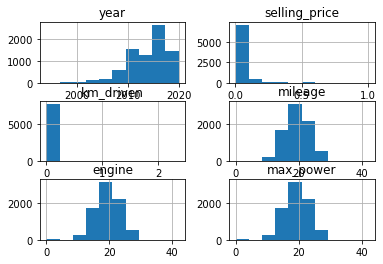

In [10]:
viz = cdf
viz.hist()
plt.show()

In [11]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [12]:
from sklearn import linear_model

In [14]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['mileage']])
train_y = np.asanyarray(train[['selling_price']])
regr.fit(train_x, train_y)
print("coefficiant: ", regr.coef_)
print("intercept: ", regr.intercept_)

coefficiant:  [[-25380.89270439]]
intercept:  [1147103.7258431]


In [15]:
from sklearn.metrics import r2_score

In [16]:
test_x = np.asanyarray(test[['mileage']])
test_y = np.asanyarray(test[['selling_price']])
y_hat = regr.intercept_ + regr.coef_ * test_x
print("R2_score: ", r2_score(test_y, y_hat))

R2_score:  0.019166275043193792
